In [2]:
import torch
from math import exp
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from torch.distributions.normal import Normal


from infrastructure import Mixture, Normal, RepeatedSampler, RepeatedSamplerWrapper, RandomWalkGaussianProposal, MALA, ULA

Target 3

In [4]:
generate_x0 = lambda: torch.distributions.uniform.Uniform(-10, 0).sample() 

(-4*x*exp(25/2)*exp(10*x) - 2*x*exp(5*x) - x*exp(-75/2) - 10*exp(5*x) - 10*exp(-75/2))/(4*exp(25/2)*exp(10*x) + 2*exp(5*x) + exp(-75/2))


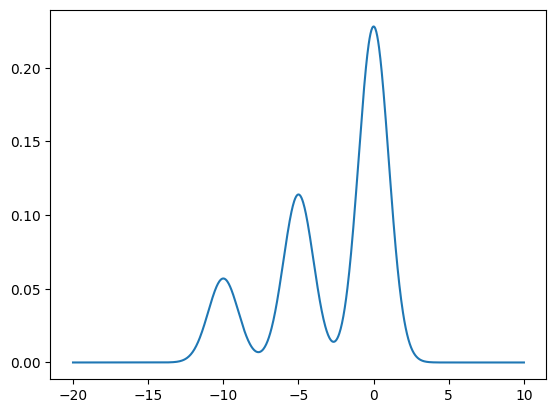

In [3]:
Target_3 = Mixture([Normal(-10, 1), Normal(-5, 1), Normal(0, 1)], [1, 2, 4])

Target_3.plot_pdf(torch.tensor(np.linspace(-20, 10, 1000)))

std = 0.5

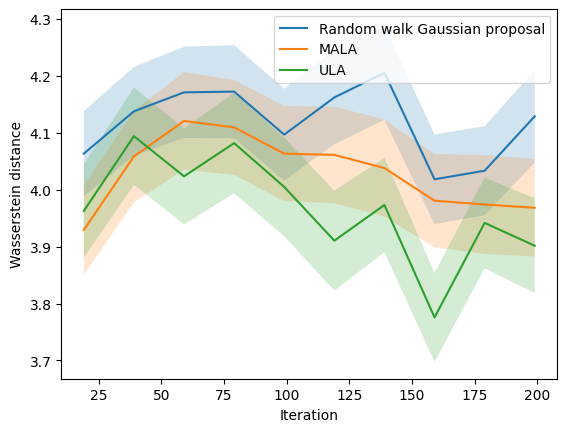

In [6]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(1 / 2)}),
RepeatedSampler({"p":Target_3, "q": MALA(1 / 4, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1/ 4, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 500, "sample_length": 200, "x0": generate_x0, "burnin": 0}, 
                            plot_args={"window_width": 20})

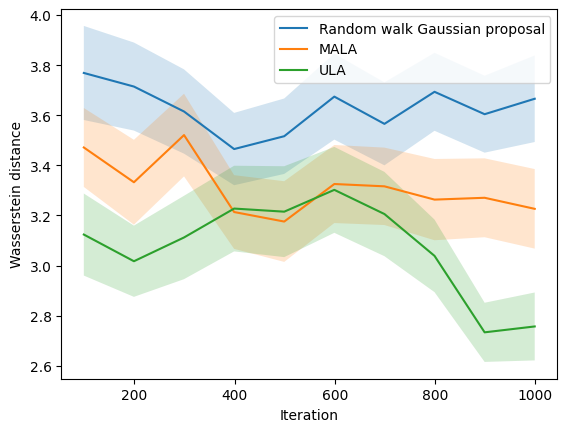

In [7]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(1 / 2)}),
RepeatedSampler({"p":Target_3, "q": MALA(1 / 4, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1/ 4, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 100, "sample_length": 1000, "x0": generate_x0, "burnin": 200}, 
                            plot_args={"window_width": 100})

std=1

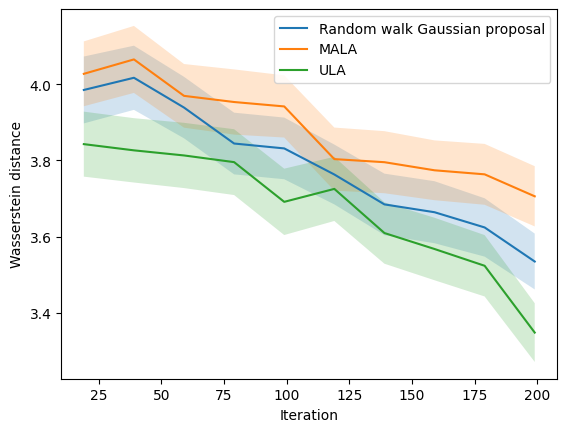

In [13]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(1)}),
RepeatedSampler({"p":Target_3, "q": MALA(1 / 2, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1 / 2, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 500, "sample_length": 200, "x0": generate_x0, "burnin": 0}, 
                            plot_args={"window_width": 20})

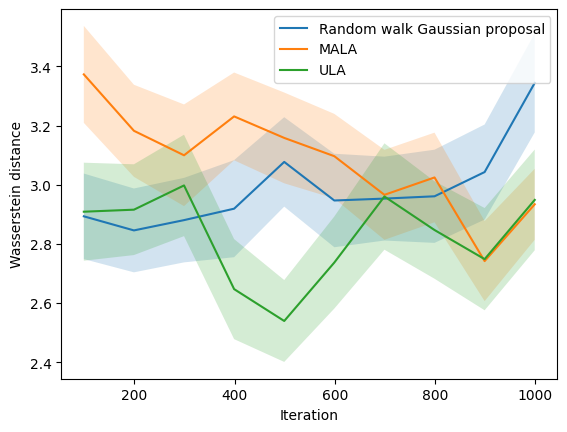

In [15]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(1)}),
RepeatedSampler({"p":Target_3, "q": MALA(1 / 2, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1 / 2, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 100, "sample_length": 1000, "x0": generate_x0, "burnin": 200}, 
                            plot_args={"window_width": 100})

std = 3

ValueError: Expected parameter loc (Tensor of shape ()) of distribution Normal(loc: nan, scale: 1.7320507764816284) to satisfy the constraint Real(), but found invalid values:
nan

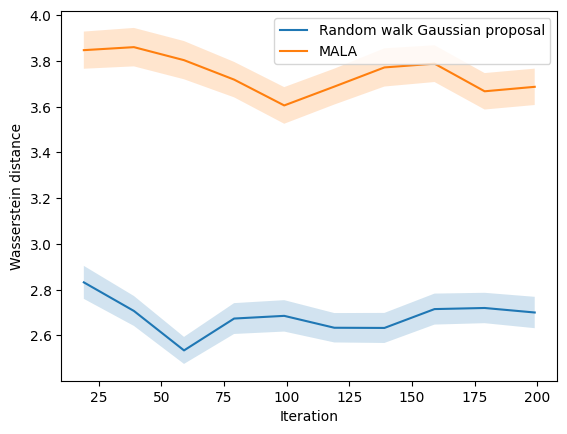

In [14]:
samplers = [
RepeatedSampler({"p":Target_3, "q": RandomWalkGaussianProposal(3)}),
RepeatedSampler({"p":Target_3, "q": MALA(1.5, Target_3.score)}),
RepeatedSampler({"p":Target_3, "q": MALA(1.5, Target_3.score, str_rep="ULA")}, sampler=ULA),
            ]


RepeatedSamplerWrapper().plot(samplers, sample_args={"repetitions": 500, "sample_length": 200, "x0": generate_x0, "burnin": 0}, 
                            plot_args={"window_width": 20})